# Hypothesis Testing (One Sample)

**statistical hypothesis:** assumption about the population average

**null hypothesis H0:** assumption that the population average is identical to a specific value

**Alternative hypothesis:** compare this one with null to decide whether accept/rejec the null hypothesis

**two types of alternative hypotheses:** one-sided and two-sided

**one-sided** - determine whether the population average differs from the hypothesized value in a specifi direction (larger than) sadece tek bir yöne bakiyor

**two-sided alternative hypothesis** -  is used to determine whether the population average is either greater than or less than the hypothesized value

**assumptions:**

-data normal olmali ve normally distributed olmali

-gözlemler birbirinden bagimsiz olmali, ayni evden insanlar olmamali

-sample 30dan büyük olmali

-population standard deviation is known, eger bunu bilmiyorsak t-distribution kullanmaliyiz hypothesis test icin


t= coefficient / std.error

std.error = std.dev / sqrt(n)

null hyptohesis: opposite of what we want to show, devils advocate

mu = 5.7, x_bar = 5.1, std.dev = 1.6 

z-test - std.deviation population icinse

t-test std.deviation sample icinse yukardaki rakamlar icin t=-3.75 t tablosu var 100 sample %

3.75 3.3390dan bile büyük 100 observation ve 99.9% confidence interval, %99 null hypothesis reject edebiliriz ya da fail to reject buna bakarken tnin önündeki degeri kaldirdik


eger t-statistics degree of freedomdan büyükse null hypothesis reject ediyoruz
eger t-statistics degree of freedomdan kücükse null hypothesis fail to reject



In [1]:
import numpy as np
import pandas as pd
from scipy import stats

### One Sided Hypothesis Tests

#### Example: Pharmaceutical Company

A pharmaceutical company is trying out a medication for lowering blood sugar and managing diabetes. It is known that any level of Hemoglobin A1c below 5.7% is considered normal. The drug company has treated 100 study volunteers with this medication and would like to prove that after treatment their mean A1c is below 5.7%.

In [4]:
pop_mean = 5.7
sample_mean = 5.1
sample_std = 1.6
n = 100

statistic = (sample_mean - pop_mean)/(sample_std/np.sqrt(n)) #t-statistics (not a t-value)
pval = stats.t.sf(np.abs(statistic), n-1) #p-value: probability to observe sthing as extreme as this
# given that our null hypothesis is true

print(statistic)
print(pval)
# pval is smaller than 5% therefore we reject H_0

-3.750000000000003
0.0001489332089038242


In [4]:
# Confidence Interval
stats.t.interval(0.95, df=n-1, loc=sample_mean, scale=(sample_std/np.sqrt(n)))
#95 sure that population means between these numbers below, confidence interval does not include 5.7, we are 95% pop_mean is not 5.7

(4.78252528775861, 5.417474712241389)

#### Example: Municipal Children's Home

Boys of a certain age are known to have a mean weight of μ = 85 pounds. A complaint is made that the boys living in a municipal children's home are underfed and thus underweight (one-sided test!!). As one bit of evidence, n = 25 boys(of the same age) are weighed and found to have a mean weight of 80.94 pounds. It is known that the population standard deviation σ is 11.6 pounds (the unrealistic part of this example!).  
Based on the available data, what should be concluded concerning the complaint?

In [8]:
pop_mean = 85 #that`s a hypothesis assumption, we cant calculate the pop_mean
sample_mean = 80.94
n = 25
pop_std = 11.6

#H_0 average of population mean is over and equal 85

statistic = (sample_mean - pop_mean)/(sample_std/np.sqrt(n)) #t-statistics (not a t-value)
pval = stats.t.sf(np.abs(statistic), n-1) #p-value: probability to observe sthing as extreme as this
# given that our null hypothesis is true

print(statistic)
print(pval) #p_value %4 cikti ve 5den kücük o yüzden ret edebiliriz

-1.750000000000001
0.046447544473094286


In [9]:
# Confidence Interval
stats.t.interval(0.95, df=n-1, loc=sample_mean, scale=(pop_std/np.sqrt(n)))

(76.15175533702299, 85.728244662977)

### Two-sided Hypothesis Tests

#### Example: Honolulu Heart Study

It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

In [7]:
pop_mean = 120
sample_mean = 130.1
sample_std = 21.21
n = 100
statistic = (sample_mean - pop_mean)/(sample_std/np.sqrt(n))
pval = stats.t.sf(np.abs(statistic), n-1)*2 # for two-sided: *2 !!
print(statistic)
print(pval)

4.761904761904759
6.562701817208617e-06


In [8]:
# Confidence Interval
stats.t.interval(0.95, df=n-1, loc=sample_mean, scale=(sample_std/np.sqrt(n)))

(125.89147584585008, 134.30852415414992)

## Using data arrays

#### Generating 1000 draws from a standard normal random variable

In [10]:
X = stats.norm(0, 1).rvs(size = 10)

#### Test if the sample average of X is equal to 0

In [13]:
stats.ttest_1samp(X, 0)

Ttest_1sampResult(statistic=2.1096262767130174, pvalue=0.06410866513210346)

#### Using actual data

In [15]:
data = pd.read_csv('../../03_data-visualization/02_lab-matplotlib-seaborn/your-code/Fitbit2.csv') 
data.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


In [16]:
data.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,...,NumberOfAwakings,LengthOfRestInMinutes,Distance_miles,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months_encoded
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,...,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,...,16.196185,321.343324,5.312180,3.010899,0.713896,4.841326,76.362799,4.818529,76.119842,6.501362
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,...,10.757622,170.786726,2.118801,1.998604,0.452555,2.579205,32.973194,2.584930,33.206279,3.459267
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,...,7.000000,248.000000,3.824539,1.000000,0.000000,3.733333,86.238532,3.725000,86.233673,3.500000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,...,16.000000,370.000000,5.151166,3.000000,1.000000,5.616667,89.433962,5.600000,89.433962,7.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,...,24.000000,440.500000,6.561678,5.000000,1.000000,6.675000,92.438419,6.650000,92.438419,9.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,...,45.000000,607.000000,12.707037,6.000000,1.000000,9.216667,100.000000,9.216667,100.000000,12.000000


In [17]:
stats.ttest_1samp(data['Distance'], 8.5)  #buradaki population mean
#sample_mean 8.5 distance icin yukarida da görüldügü gibi

#distance ortalama 8.5a yakin mi?, pvalue is large we fail to reject our null hypothesis

Ttest_1sampResult(statistic=0.2760091723270195, pvalue=0.7826967998541668)

In [18]:
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind, t, sem

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

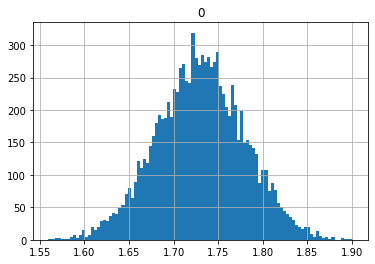

In [21]:
population_mean = 1.73
population_sd = 0.05

population = pd.DataFrame(np.random.normal(population_mean,population_sd,size=10000))
population.mean()
population.hist(bins=100)
plt.show()